# Chainer CIFAR100

## Trace with

```
5Feb1001peter@mouse:~$ ./comb_profile.sh ./run_cifar.sh chainer_mouse_nvsmi_50
Using file names: nvidia-smi-chainer_mouse_nvsmi_50.csv and nvprof-trace-chainer_mouse_nvsmi_50-%p.csv
Starting nvidia-smi
/home/peter/.local/lib/python2.7/site-packages/cupy/core/fusion.py:659: FutureWarning: cupy.core.fusion is experimental. The interface can change in the future.
  util.experimental('cupy.core.fusion')
GPU: 0
# Minibatch-size: 1024
# epoch: 2

Using CIFAR100 dataset.
epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
1           4.71834     4.5589                0.0145886      0.0169224                 47.724
2           4.55084     4.62051               0.0165418      0.0107103                 95.1556
nvidia-smi finished
```

And

```
5Feb1004peter@mouse:~$ ./comb_profile.sh ./run_cifar.sh chainer_mouse_nvsmi_25
```

In [2]:
%matplotlib inline
import re
import numpy as np
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
import os.path
import datetime
from cycler import cycler
import pandas as pd

In [3]:
nvsmi100_file  = "nvidia-smi-chainer_mouse_combined.csv"
nvsmi50_file  = "nvidia-smi-chainer_mouse_nvsmi_50.csv"
nvsmi25_file  = "nvidia-smi-chainer_mouse_nvsmi_25.csv"

In [42]:
# Parse date from readable format to seconds
start=0
def parseTime(date_time):
    global start
    if isinstance(date_time,float):
        print date_time,"is float"
        return date_time
    dt_obj = datetime.datetime.strptime(date_time, "%Y-%m-%d %H:%M:%S.%f")
    seconds = 0
    if start == 0:
        start = dt_obj
    else:
        seconds = (dt_obj - start).total_seconds()
    return seconds

In [44]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(s):
    global pat
    if not isinstance(s,str):
        print "Not a string:",s
        return s
    f = pat.search(s)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [50]:
filename = nvsmi100_file
print "Reading",filename

smi_data = pd.read_csv(filename,header=[0], skiprows=[0,1])
smi_data = smi_data[~smi_data["gpu"].isnull()]
cols = [0,2,7]
smi_data = smi_data.drop(smi_data.columns[cols],axis=1)
smi_data["sec"] = smi_data["time python"].apply(parseTime)
smi_data.index = smi_data["sec"]
smi_data = smi_data.drop(smi_data.columns[[0,6]],axis=1)
smi_data = smi_data.applymap(parseFloat)
smi_data["PCI sent"] = smi_data["PCI sent"].apply(lambda x: x/1e6)
smi_data["PCI recv"] = smi_data["PCI recv"].apply(lambda x: x/1e6)
smi_data.iloc[:3]

Reading nvidia-smi-chainer_mouse_combined.csv


,PCI sent,PCI recv,GPU util,Memory util,29151 Used Memory
sec,,,,,
0.000000,0.004,0.011,0.0,8.0,8.0
0.160743,0.050,0.710,0.0,2.0,107.0
0.315228,0.059,0.341,4.0,1.0,355.0


/Users/peterbryzgalov/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


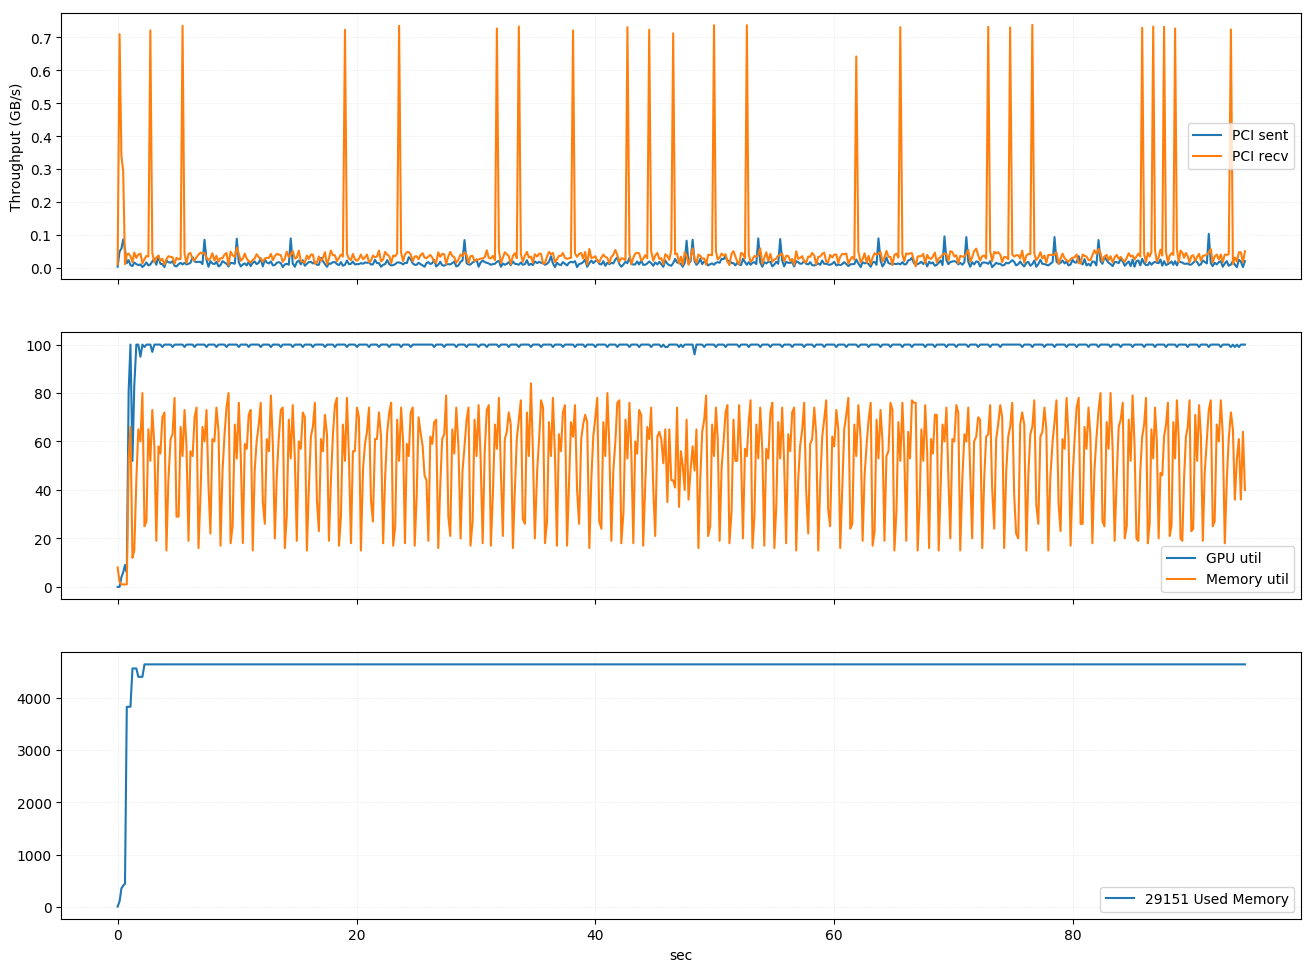

In [51]:
plt.rcParams['figure.figsize'] = 16,12
fig, axarr = plt.subplots(3,sharex=True)
smi_data.ix[:,0:2].plot(ax = axarr[0])
smi_data.ix[:,2:4].plot(ax = axarr[1])
smi_data.ix[:,4:].plot(ax = axarr[2])
axarr[0].set_ylabel('Throughput (GB/s)')
axarr[0].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[1].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[2].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[0].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[1].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[2].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)

Reading nvidia-smi-chainer_mouse_nvsmi_50.csv


/Users/peterbryzgalov/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


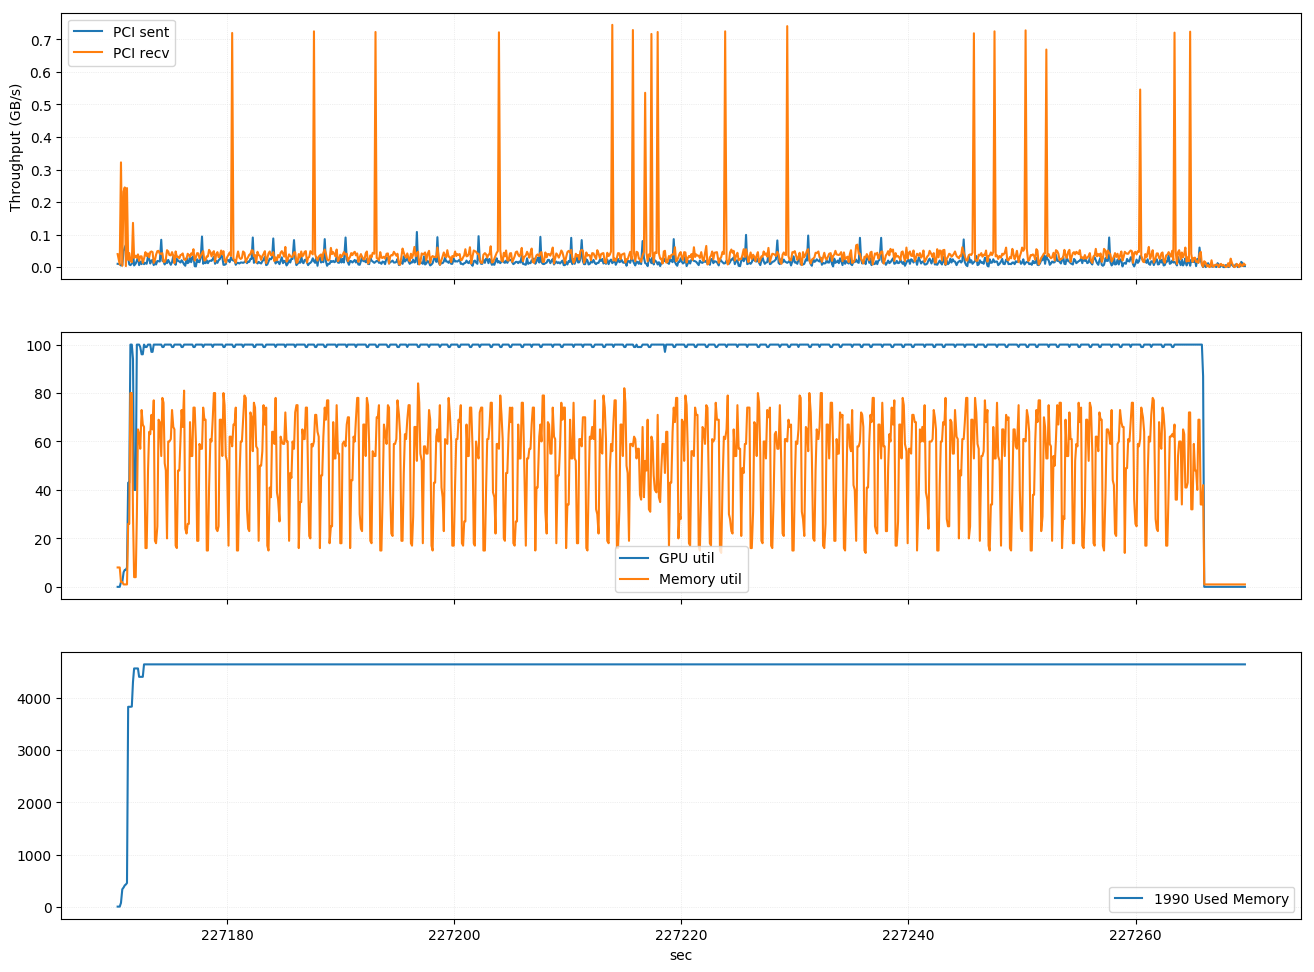

In [52]:
filename = nvsmi50_file
print "Reading",filename

smi_data = pd.read_csv(filename,header=[0], skiprows=[0,1])
smi_data = smi_data[~smi_data["gpu"].isnull()]
cols = [0,2,7]
smi_data = smi_data.drop(smi_data.columns[cols],axis=1)
smi_data["sec"] = smi_data["time python"].apply(parseTime)
smi_data.index = smi_data["sec"]
smi_data = smi_data.drop(smi_data.columns[[0,6]],axis=1)
smi_data = smi_data.applymap(parseFloat)
smi_data["PCI sent"] = smi_data["PCI sent"].apply(lambda x: x/1e6)
smi_data["PCI recv"] = smi_data["PCI recv"].apply(lambda x: x/1e6)

fig, axarr = plt.subplots(3,sharex=True)
smi_data.ix[:,0:2].plot(ax = axarr[0])
smi_data.ix[:,2:4].plot(ax = axarr[1])
smi_data.ix[:,4:].plot(ax = axarr[2])
axarr[0].set_ylabel('Throughput (GB/s)')
axarr[0].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[1].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[2].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[0].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[1].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[2].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)

Reading nvidia-smi-chainer_mouse_nvsmi_25.csv


/Users/peterbryzgalov/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


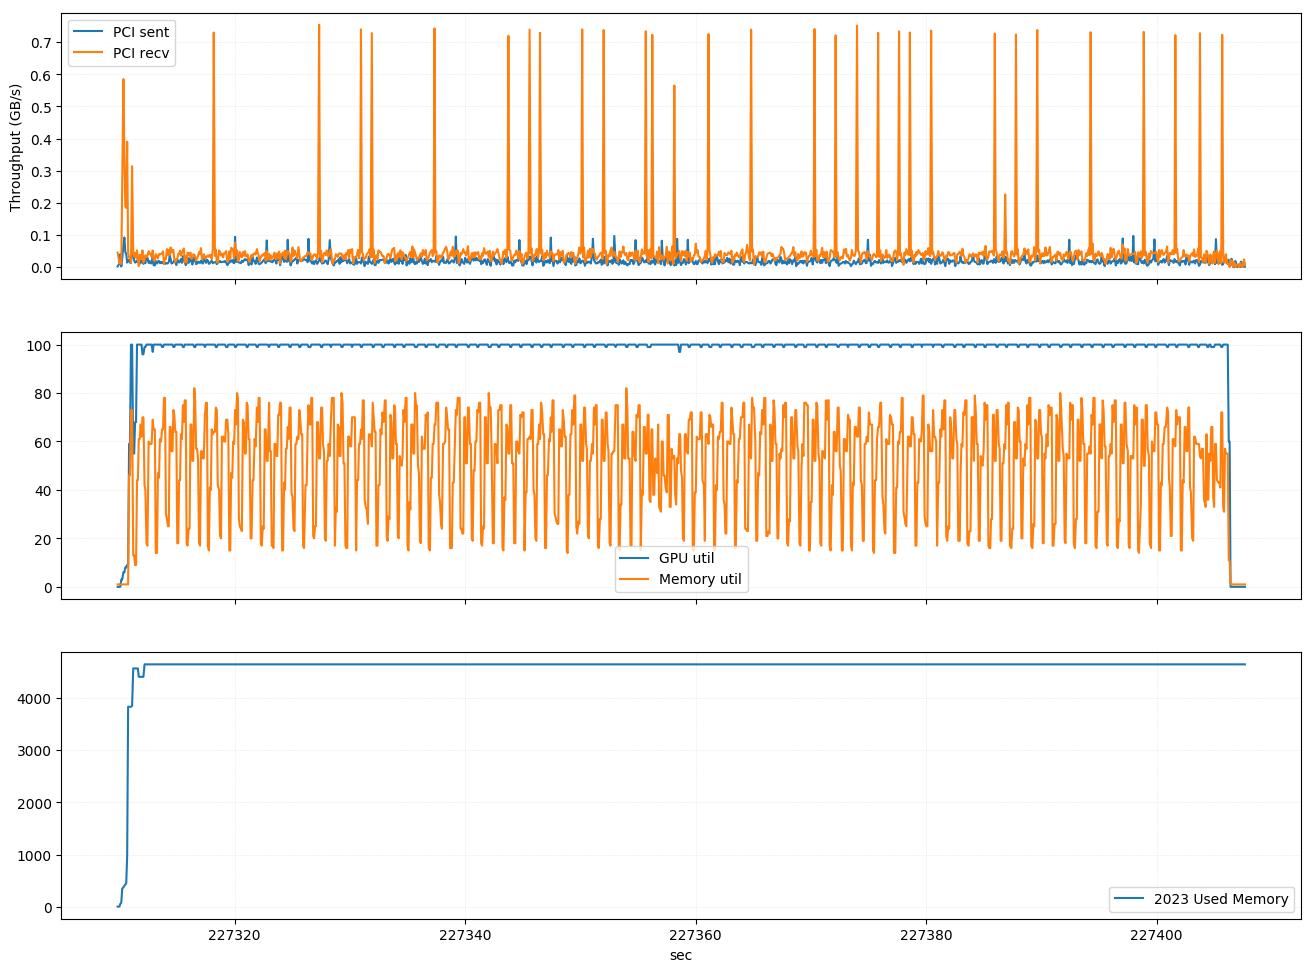

In [53]:
filename = nvsmi25_file
print "Reading",filename

smi_data = pd.read_csv(filename,header=[0], skiprows=[0,1])
smi_data = smi_data[~smi_data["gpu"].isnull()]
cols = [0,2,7]
smi_data = smi_data.drop(smi_data.columns[cols],axis=1)
smi_data["sec"] = smi_data["time python"].apply(parseTime)
smi_data.index = smi_data["sec"]
smi_data = smi_data.drop(smi_data.columns[[0,6]],axis=1)
smi_data = smi_data.applymap(parseFloat)
smi_data["PCI sent"] = smi_data["PCI sent"].apply(lambda x: x/1e6)
smi_data["PCI recv"] = smi_data["PCI recv"].apply(lambda x: x/1e6)

fig, axarr = plt.subplots(3,sharex=True)
smi_data.ix[:,0:2].plot(ax = axarr[0])
smi_data.ix[:,2:4].plot(ax = axarr[1])
smi_data.ix[:,4:].plot(ax = axarr[2])
axarr[0].set_ylabel('Throughput (GB/s)')
axarr[0].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[1].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[2].yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[0].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[1].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
axarr[2].xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)